In [11]:
# open the file 
import pandas as pd



In [12]:
sg2 = "C:/Ironhack/ih - projects/Redefining-Academic-Success-Beyond-Grades-and-Dropout-Rates/StudentPerformanceFactors.csv"
dataset2 =pd.read_csv(sg2)

dataset2.shape


(6607, 20)

In [13]:
dataset2.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

In [14]:
# Check for null values
dataset2.isnull().sum()



Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [15]:
dataset2 = dataset2.drop_duplicates()

In [16]:
dataset2.columns = dataset2.columns.str.strip().str.lower().str.replace(' ', '_')

Data Transformation and Normalization


In [20]:
# Encode Categorical Features
# Ordinal categories
ordinal_mappings = {
    'parental_involvement': {'low': 0, 'Medium': 1, 'High': 2},
    'access_to_resources': {'Low': 0, 'Medium': 1, 'High': 2},
    'motivation_level': {'Low': 0, 'Medium': 1, 'High': 2},
    'family_income': {'Low': 0, 'Medium': 1, 'High': 2},
    'teacher_quality': {'Low': 0, 'Medium': 1, 'High': 2},
    'parental_education_level': {'High School': 0, 'College': 1, 'Postgraduate': 2},
    'distance_from_home': {'Near': 0, 'Moderate': 1, 'Far': 2},
    'peer_influence': {'Negative': 0, 'Neutral': 1, 'Positive': 2}
}

for col, mapping in ordinal_mappings.items():
    dataset2[col] = dataset2[col].map(mapping)



In [23]:
# Nominal Categories
dataset2 = pd.get_dummies(dataset2, columns=['school_type'], drop_first=True)


In [22]:
# Encoding for Booleans
binary_mappings = {
    'extracurricular_activities': {'No': 0, 'Yes': 1},
    'internet_access': {'No': 0, 'Yes': 1},
    'learning_disabilities': {'No': 0, 'Yes': 1},
    'gender': {'Male': 0, 'Female': 1}
}
for col, mapping in binary_mappings.items():
    dataset2[col] = dataset2[col].map(mapping)


In [26]:
# Scaling Numerical Features
numerical_cols = [
  'hours_studied',
'attendance',
      'parental_involvement',
        'access_to_resources',
          'extracurricular_activities',
            'sleep_hours',
              'previous_scores',
                'motivation_level',
                  'internet_access',
                    'tutoring_sessions', 
                    'family_income', 
                    'teacher_quality', 
                    'peer_influence', 
                    'physical_activity', 
                    'learning_disabilities', 
                    'parental_education_level', 
                    'distance_from_home', 
                    'gender', 
                    'exam_score']


In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dataset2[numerical_cols] = scaler.fit_transform(dataset2[numerical_cols])

Feature Engineering


In [30]:
# Creating new success metrics
dataset2['consistency'] = dataset2[['previous_scores', 'attendance']].mean(axis=1)
dataset2['engagement'] = dataset2[['extracurricular_activities', 'tutoring_sessions', 'internet_access']].mean(axis=1)
dataset2['learning_disabilities_inverse'] = 1 - dataset2['learning_disabilities']
dataset2['resilience'] = dataset2[[
    'motivation_level', 'parental_involvement', 'learning_disabilities_inverse'
]].mean(axis=1)
dataset2['adaptability'] = dataset2[['access_to_resources', 'peer_influence', 'distance_from_home']].mean(axis=1)
dataset2['academia'] = dataset2[['exam_score', 'hours_studied', 'tutoring_sessions']].mean(axis=1)

# Final success score
dataset2['success_score'] = dataset2[[
    'consistency', 'engagement', 'resilience', 'adaptability', 'academia'
]].mean(axis=1)

In [31]:
from sklearn.model_selection import train_test_split

X = dataset2.drop(columns=["success_score"]) 
y = dataset2["success_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.9631516227555477
MSE: 0.0002826770107281206


<Axes: >

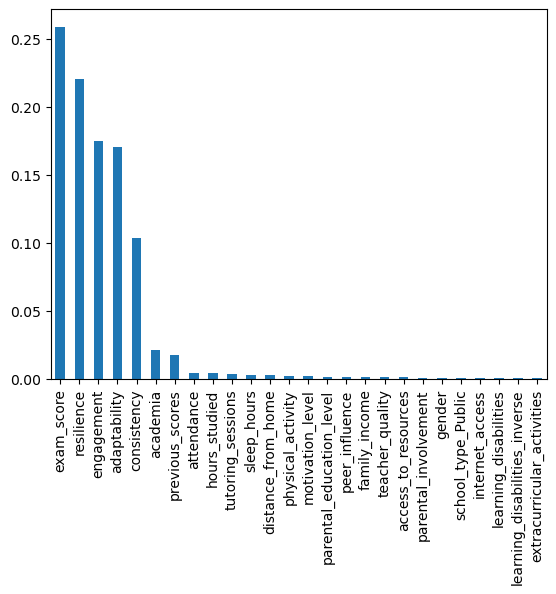

In [33]:


importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).plot(kind='bar')
